<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Stochastics

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='http://fpq.io'>http://fpq.io</a> | <a href='mailto:team@tpq.io'>team@tpq.io</a>

## Random Numbers

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import numpy.random as npr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
npr.rand(10)

array([ 0.93895185,  0.41444964,  0.76642489,  0.97141305,  0.6169951 ,
        0.93829487,  0.56035116,  0.29318751,  0.16531617,  0.46447771])

In [3]:
npr.rand(5, 5)

array([[ 0.44242812,  0.9188745 ,  0.25473538,  0.4821627 ,  0.56008935],
       [ 0.08723415,  0.65345669,  0.95914735,  0.52426579,  0.20217959],
       [ 0.90896067,  0.56868118,  0.88809936,  0.03601201,  0.31977853],
       [ 0.49232944,  0.44330021,  0.0274399 ,  0.55258506,  0.73617025],
       [ 0.65933342,  0.44919477,  0.48276162,  0.61681927,  0.12709042]])

In [4]:
a = 5.
b = 10.
npr.rand(10) * (b - a) + a

array([ 6.20115224,  5.42539605,  8.46482461,  7.75975041,  5.92287929,
        7.80020078,  6.09313384,  8.47410104,  9.62902374,  8.29500105])

In [5]:
npr.rand(5, 5) * (b - a) + a

array([[ 6.41443967,  5.0731729 ,  8.56704158,  7.0384733 ,  8.96904787],
       [ 5.88730827,  6.97062053,  9.6002055 ,  9.63406539,  6.43905119],
       [ 9.65414518,  6.40813766,  5.44353127,  8.62337801,  9.79704934],
       [ 8.68544143,  9.76077367,  7.87704339,  9.48278807,  6.00403878],
       [ 5.67989181,  6.270205  ,  9.67287376,  6.41934016,  7.16575834]])

In [6]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

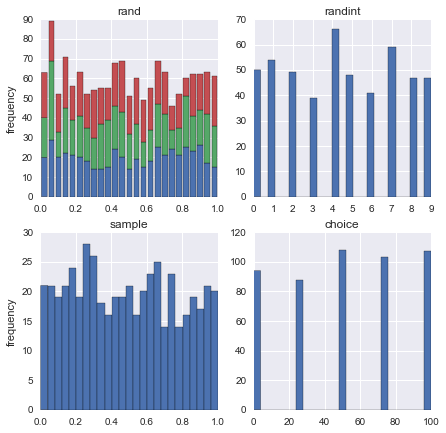

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(7, 7))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax2.grid(True)
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax3.grid(True)
ax4.hist(rn4, bins=25)
ax4.set_title('choice')
ax4.grid(True)

In [8]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

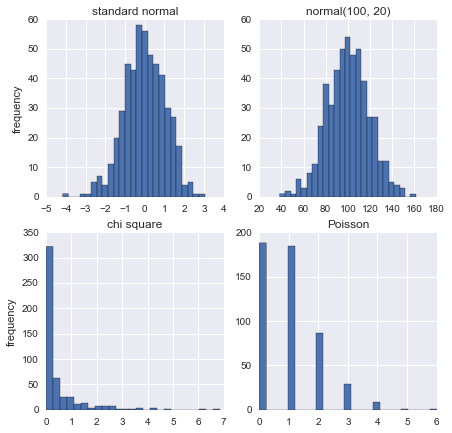

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax2.grid(True)
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax3.grid(True)
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')
ax4.grid(True)

## Simulation

### Random Variables

In [10]:
%%time
S0 = 100  # initial value
r = 0.05  # constant short rate
sigma = 0.25  # constant volatility
T = 2.0  # in years
I = 10000  # number of random draws
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

CPU times: user 1.33 ms, sys: 514 µs, total: 1.85 ms
Wall time: 979 µs


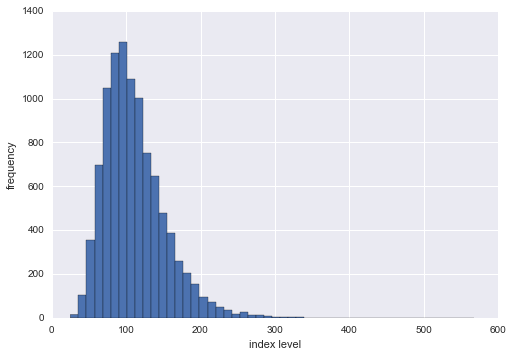

In [11]:
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [12]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * np.sqrt(T), size=I)

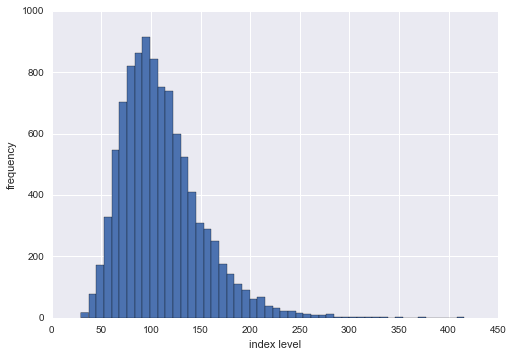

In [13]:
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [14]:
import scipy.stats as scs

In [15]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2 : ndarray objects
        results object from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print "%14s %14s %14s" % \
        ('statistic', 'data set 1', 'data set 2')
    print 45 * "-"
    print "%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0])
    print "%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0])
    print "%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1])
    print "%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2])
    print "%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3]))
    print "%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4])
    print "%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5])

In [16]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         25.017         29.387
           max        567.602        415.945
          mean        111.304        110.708
           std         41.429         40.440
          skew          1.297          1.194
      kurtosis          3.902          2.717


### Stochastic Processes

#### Geometric Brownian Motion

In [17]:
%%time
I = 10000
M = 100
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))

CPU times: user 77.8 ms, sys: 5.01 ms, total: 82.8 ms
Wall time: 85.2 ms


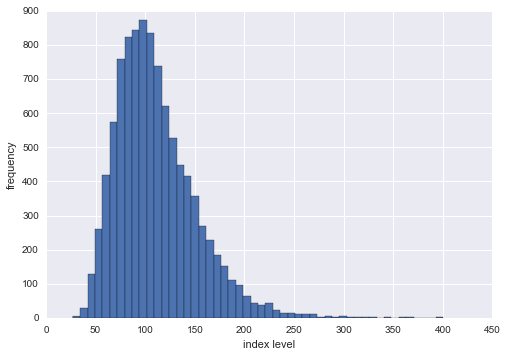

In [18]:
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [19]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         26.950         29.387
           max        400.331        415.945
          mean        110.770        110.708
           std         39.958         40.440
          skew          1.146          1.194
      kurtosis          2.588          2.717


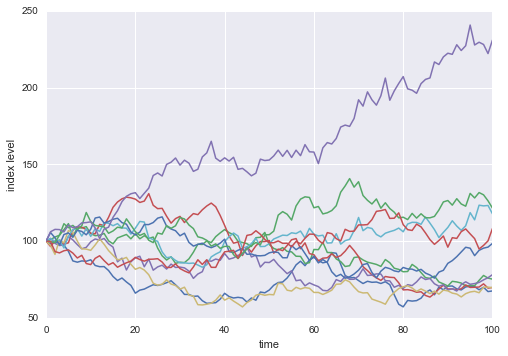

In [20]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

#### Square-Root Diffusion

$$dr_t = \kappa (\theta - r_t) dt + \sigma \sqrt{r_t} dZ_t$$

In [21]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

In [22]:
I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
              + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
              + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)  
              * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

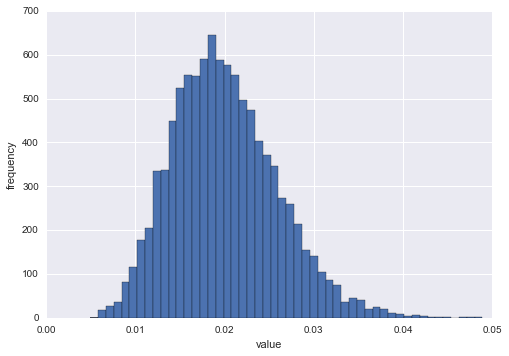

In [23]:
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

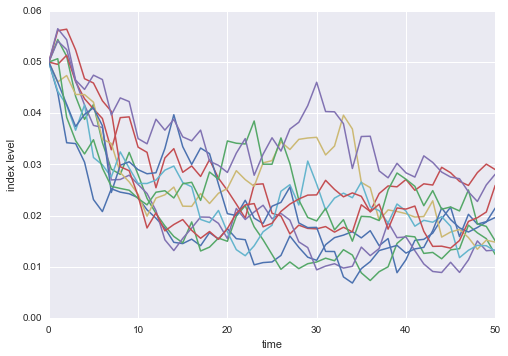

In [24]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [25]:
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1] 
        x2[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x2
x2 = srd_exact()

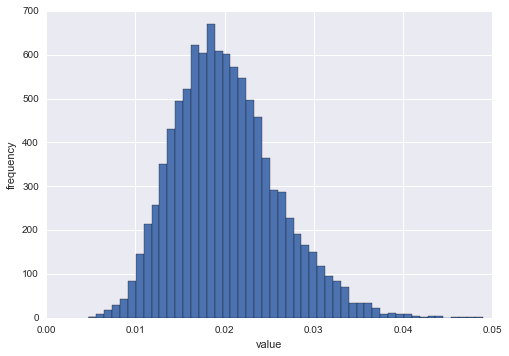

In [26]:
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

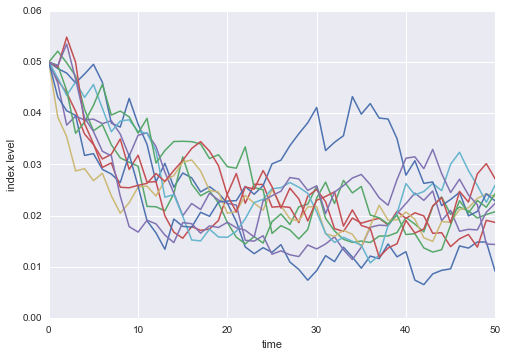

In [27]:
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [28]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.005
           max          0.049          0.049
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.520          0.571
      kurtosis          0.386          0.478


In [29]:
I = 250000
%time x1 = srd_euler()

CPU times: user 1.08 s, sys: 399 ms, total: 1.48 s
Wall time: 1.57 s


In [30]:
%time x2 = srd_exact()

CPU times: user 1.96 s, sys: 87.8 ms, total: 2.05 s
Wall time: 2.06 s


In [31]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.003          0.003
           max          0.058          0.055
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.558          0.575
      kurtosis          0.454          0.480


#### Stochastic Volatility

In [32]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [33]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [34]:
cho_mat

array([[ 1. ,  0. ],
       [ 0.6,  0.8]])

In [35]:
M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I))

In [36]:
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
          + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)  
          * ran[1])
v = np.maximum(vh, 0)

In [37]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

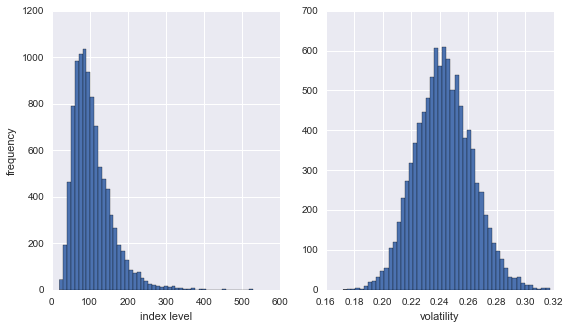

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)

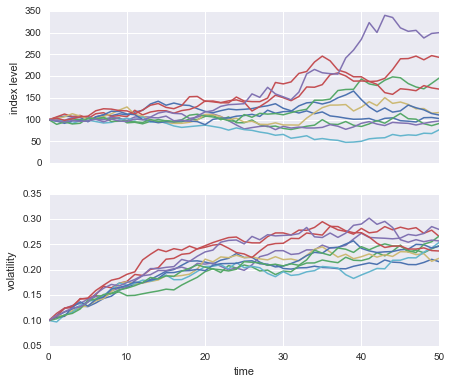

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

In [40]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         20.037          0.172
           max        528.482          0.317
          mean        107.090          0.243
           std         51.386          0.020
          skew          1.662          0.154
      kurtosis          5.166          0.026


#### Jump-Diffusion

In [41]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

In [42]:
M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

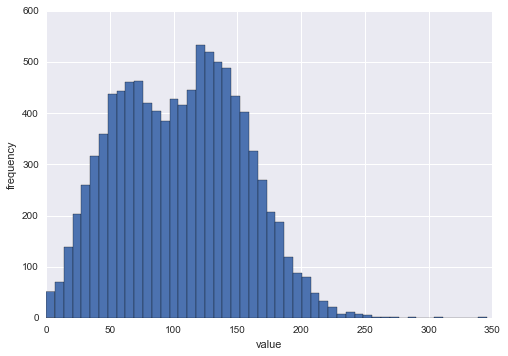

In [43]:
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

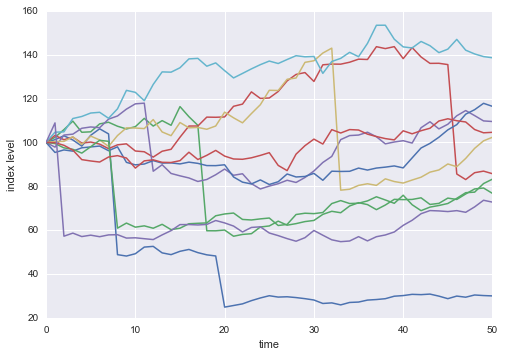

In [44]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

### Variance Reduction

In [45]:
print "%15s %15s" % ('Mean', 'Std. Deviation')
print 31 * "-"
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * 10000)
    print "%15.12f %15.12f" % (sn.mean(), sn.std())

           Mean  Std. Deviation
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [46]:
i ** 2 * 10000

8410000

In [47]:
sn = npr.standard_normal(10000 / 2)
sn = np.concatenate((sn, -sn))
np.shape(sn)

(10000,)

In [48]:
print "%15s %15s" % ('Mean', 'Std. Deviation')
print 31 * "-"
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * 10000 / 2)
    sn = np.concatenate((sn, -sn))
    print "%15.12f %15.12f" % (sn.mean(), sn.std())

           Mean  Std. Deviation
-------------------------------
-0.000000000000  1.009653753942
-0.000000000000  1.000413716783
-0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
 0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
 0.000000000000  0.999435175324
 0.000000000000  0.999356961431
 0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [49]:
sn = npr.standard_normal(10000)

In [50]:
sn.mean()

-0.0011659982951624944

In [51]:
sn.std()

0.99125592020460496

In [52]:
sn_new = (sn - sn.mean()) / sn.std()

In [53]:
sn_new.mean()

-2.4513724383723456e-17

In [54]:
sn_new.std()

0.99999999999999989

In [55]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M : int
        number of time intervals for discretization
    I : int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math : boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, I / 2))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

## Valuation

### European Options

In [56]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * np.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

In [57]:
gbm_mcs_stat(K=105.)

10.044221852841925

In [58]:
M = 50
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

In [59]:
gbm_mcs_dyna(K=110., option='call')

7.9500085250284336

In [60]:
gbm_mcs_dyna(K=110., option='put')

12.629934942682004

In [61]:
from bsm_functions import bsm_call_value
stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80., 120.1, 5.)
np.random.seed(200000)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

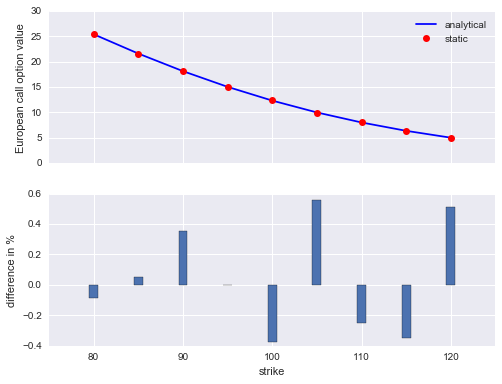

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

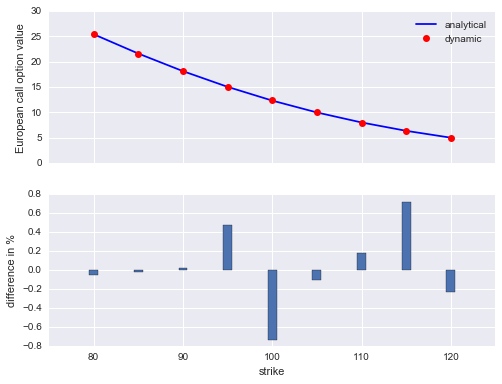

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

### American Options

In [64]:
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    df = np.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * 1 / I * np.sum(V[1])
    return C0

In [65]:
gbm_mcs_amer(110., option='call')

7.7789332794493156

In [66]:
gbm_mcs_amer(110., option='put')

13.614023206242445

In [67]:
euro_res = []
amer_res = []
k_list = np.arange(80., 120.1, 5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

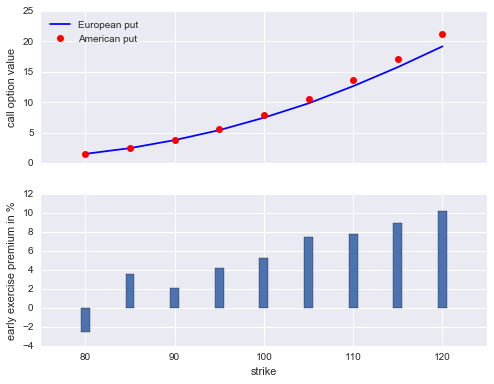

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.grid(True)
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

## Risk Measures

### Value-at-Risk

In [69]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

In [70]:
R_gbm = np.sort(ST - S0)

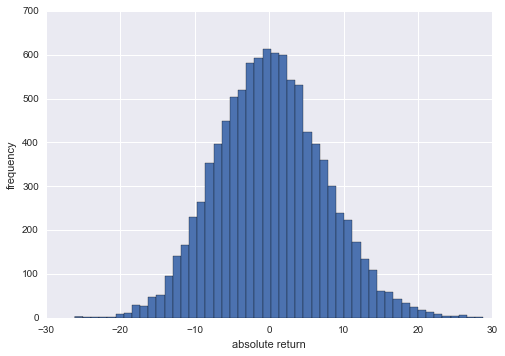

In [71]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [72]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print "%16s %16s" % ('Confidence Level', 'Value-at-Risk')
print 33 * "-"
for pair in zip(percs, var):
    print "%16.2f %16.3f" % (100 - pair[0], -pair[1])

Confidence Level    Value-at-Risk
---------------------------------
           99.99           26.072
           99.90           20.175
           99.00           15.753
           97.50           13.265
           95.00           11.298
           90.00            8.942


In [73]:
dt = 30. / 365 / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

In [74]:
R_jd = np.sort(S[-1] - S0)

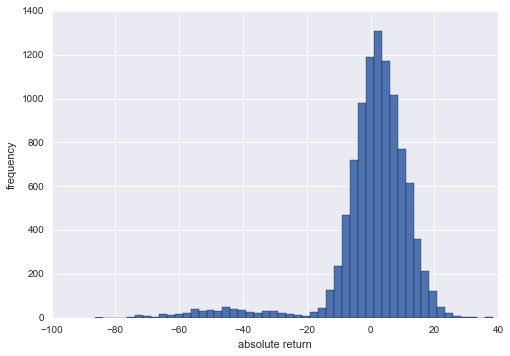

In [75]:
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [76]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print "%16s %16s" % ('Confidence Level', 'Value-at-Risk')
print 33 * "-"
for pair in zip(percs, var):
    print "%16.2f %16.3f" % (100 - pair[0], -pair[1])

Confidence Level    Value-at-Risk
---------------------------------
           99.99           75.029
           99.90           71.833
           99.00           55.901
           97.50           45.697
           95.00           25.993
           90.00            8.773


In [77]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

(-90.0, 0.0)

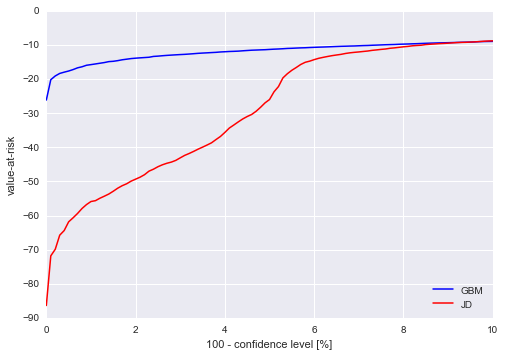

In [78]:
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.grid(True)
plt.ylim(ymax=0.0)

### Credit Value Adjustments

In [79]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

In [80]:
L = 0.5

In [81]:
p = 0.01

In [82]:
D = npr.poisson(p * T, I)
D = np.where(D > 1, 1, D)

In [83]:
np.exp(-r * T) * 1 / I * np.sum(ST)

99.981825216842921

In [84]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * ST)
CVaR

0.5152011134161355

In [85]:
S0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * ST)
S0_CVA

99.466624103426781

In [86]:
S0_adj = S0 - CVaR
S0_adj

99.48479888658386

In [87]:
np.count_nonzero(L * D * ST)

1031

(0.0, 175)

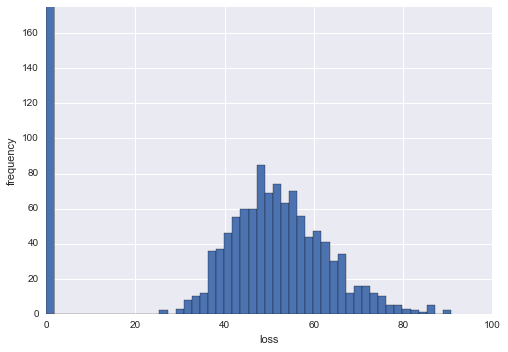

In [88]:
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=175)

In [89]:
K = 100.
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
C0

10.427336109660052

In [90]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * hT)
CVaR

0.053822578452208093

In [91]:
C0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * hT)
C0_CVA

10.373513531207843

In [92]:
np.count_nonzero(L * D * hT)  # number of losses

582

In [93]:
np.count_nonzero(D)  # number of defaults

1031

In [94]:
I - np.count_nonzero(hT)  # zero payoff

43995

(0.0, 350)

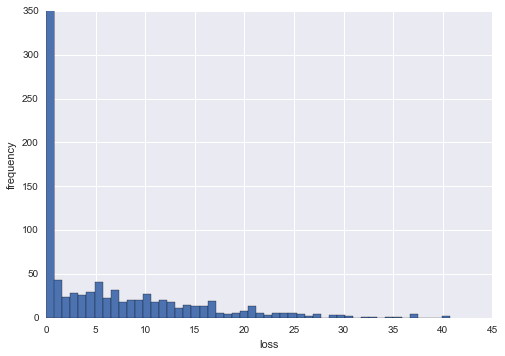

In [95]:
plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=350)

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**Python Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>